In [1]:
#Importing Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/Users/kunaldeshpande/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import re # importing regression

In [3]:
#importing data set

In [4]:
tub_train_data=pd.read_csv("/Users/kunaldeshpande/Desktop/Final Data/Experiments/19055288/19055288_training data.csv", delimiter=',', header=None, skiprows=1, names=['Make','Date','Series','Title','Person','Rating(Sell)','Weather','Shape','Cost'])

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
tub_train_data

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape,Cost
0,Cambs,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,299.0
1,Cambs,23/06/2022,Comfort,Bergen Six Person,6.0,3.0,Sunny,Square,350.0
2,Cambs,23/06/2022,Comfort,Tekapo Six person,6.0,3.0,Sunny,Round,579.0
3,Cambs,23/06/2022,Comfort,Tekapo Four person,4.0,3.0,Sunny,Round,499.0
4,Cambs,23/06/2022,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1299.0
...,...,...,...,...,...,...,...,...,...
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tub_train_data.dropna(inplace=True)

In [8]:
tub_train_data["Shape"].value_counts()

Round           700
Square          255
Square Round     46
Square round      4
Name: Shape, dtype: int64

In [9]:
tub_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1005 non-null   object 
 1   Date          1005 non-null   object 
 2   Series        1005 non-null   object 
 3   Title         1005 non-null   object 
 4   Person        1005 non-null   float64
 5   Rating(Sell)  1005 non-null   float64
 6   Weather       1005 non-null   object 
 7   Shape         1005 non-null   object 
 8   Cost          1005 non-null   float64
dtypes: float64(3), object(6)
memory usage: 78.5+ KB


In [10]:
tub_train_data

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape,Cost
0,Cambs,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,299.00
1,Cambs,23/06/2022,Comfort,Bergen Six Person,6.0,3.0,Sunny,Square,350.00
2,Cambs,23/06/2022,Comfort,Tekapo Six person,6.0,3.0,Sunny,Round,579.00
3,Cambs,23/06/2022,Comfort,Tekapo Four person,4.0,3.0,Sunny,Round,499.00
4,Cambs,23/06/2022,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1299.00
...,...,...,...,...,...,...,...,...,...
1000,Frono,04/08/2022,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1349.99
1001,Frono,04/08/2022,Comfort,Ottomon Six person,6.0,4.0,Sunny,Round,339.99
1002,Frono,04/08/2022,Urban,Vito Six Person,6.0,5.0,Sunny,Square Round,499.99
1003,Frono,04/08/2022,Comfort,Bergen Six Person,6.0,3.0,Sunny,Round,379.95


In [11]:
tub_name=tub_train_data['Title']
tub_cost=tub_train_data['Cost']

In [12]:
def cleanreg(x):
    reps = [['\s+$',''],['^\s+',''],['\s{2,}',' ']]
    for r in reps:
        x = re.sub(r[0],r[1],x)
    return x 

In [13]:
tub_train_data['Title'] = tub_train_data['Title'].apply(lambda x: cleanreg(x))
tub_train_data['Make'] = tub_train_data['Make'].apply(lambda x: cleanreg(x))
tub_train_data['Date'] = tub_train_data['Date'].apply(lambda x: cleanreg(x))
tub_train_data['Series'] = tub_train_data['Series'].apply(lambda x: cleanreg(x))
tub_train_data['Weather'] = tub_train_data['Weather'].apply(lambda x: cleanreg(x))
tub_train_data['Shape'] = tub_train_data['Shape'].apply(lambda x: cleanreg(x))
#'''Repeat this step for all text string columns'''

In [14]:
tub_train_data.shape

(1005, 9)

In [15]:
tub_train_data.isnull().sum()

Make            0
Date            0
Series          0
Title           0
Person          0
Rating(Sell)    0
Weather         0
Shape           0
Cost            0
dtype: int64

In [16]:
tub_train_data["Sell_Date"] = pd.to_datetime(tub_train_data.Date, format="%d/%m/%Y").dt.day

In [17]:
tub_train_data["Sell_month"] = pd.to_datetime(tub_train_data["Date"], format = "%d/%m/%Y").dt.month

In [18]:
tub_train_data.head(50)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month
0,Cambs,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,299.0,23,6
1,Cambs,23/06/2022,Comfort,Bergen Six Person,6.0,3.0,Sunny,Square,350.0,23,6
2,Cambs,23/06/2022,Comfort,Tekapo Six person,6.0,3.0,Sunny,Round,579.0,23,6
3,Cambs,23/06/2022,Comfort,Tekapo Four person,4.0,3.0,Sunny,Round,499.0,23,6
4,Cambs,23/06/2022,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1299.0,23,6
5,Cambs,23/06/2022,Frame,Mono Six Person,6.0,5.0,Sunny,Round,999.0,23,6
6,Cambs,23/06/2022,Urban,Rimba Six person,6.0,5.0,Sunny,Round,649.0,23,6
7,Cambs,23/06/2022,Comfort,Ottomon Six person,6.0,4.0,Sunny,Round,549.0,23,6
8,Cambs,23/06/2022,Premium,Camaro Four Person,4.0,5.0,Sunny,Round,649.0,23,6
9,Amazon,23/06/2022,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,247.0,23,6


In [19]:
tub_train_data.drop(["Date"], axis = 1, inplace = True)

In [20]:
tub_train_data.head(15)

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month
0,Cambs,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,299.0,23,6
1,Cambs,Comfort,Bergen Six Person,6.0,3.0,Sunny,Square,350.0,23,6
2,Cambs,Comfort,Tekapo Six person,6.0,3.0,Sunny,Round,579.0,23,6
3,Cambs,Comfort,Tekapo Four person,4.0,3.0,Sunny,Round,499.0,23,6
4,Cambs,Frame,Tuscany Six Person,6.0,5.0,Sunny,Round,1299.0,23,6
5,Cambs,Frame,Mono Six Person,6.0,5.0,Sunny,Round,999.0,23,6
6,Cambs,Urban,Rimba Six person,6.0,5.0,Sunny,Round,649.0,23,6
7,Cambs,Comfort,Ottomon Six person,6.0,4.0,Sunny,Round,549.0,23,6
8,Cambs,Premium,Camaro Four Person,4.0,5.0,Sunny,Round,649.0,23,6
9,Amazon,Comfort,Bergen Four Person,4.0,2.0,Sunny,Square,247.0,23,6


In [21]:
#we do have to handel categorical data which is generally nominal & ordinal data, 
#nomianal  dont have any data in order so we use label encoder
#ordinal data is in the order so we can use label encoder


In [22]:
tub_train_data["Make"].value_counts()

Amazon    240
Mspa      215
Cambs     155
Frono     145
GSD       130
Alice     120
Name: Make, dtype: int64

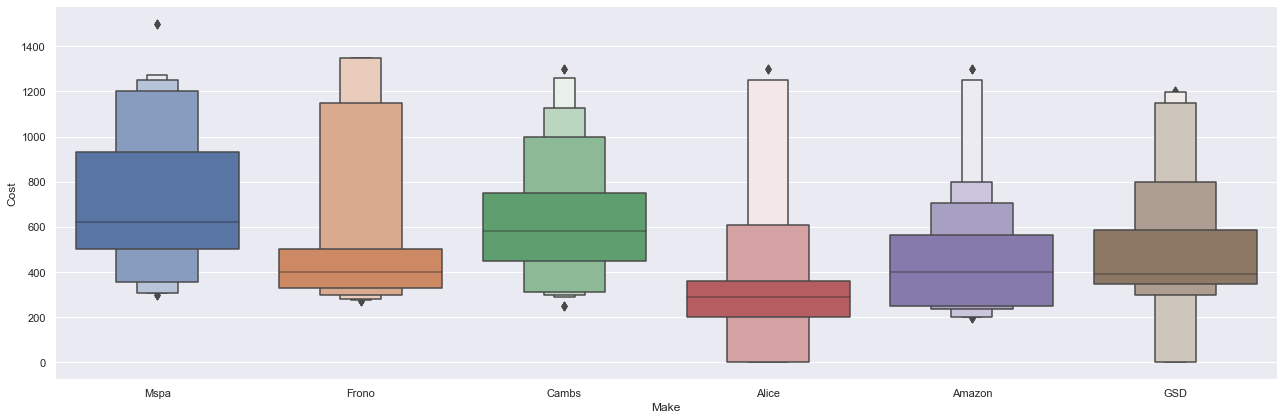

In [23]:
#this graph shows the Mspa sells highest in mspa
sns.catplot(y = "Cost", x = "Make", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [24]:
#OneHotEncoding

Make = tub_train_data[["Make"]]

Make = pd.get_dummies(Make, drop_first= False)

Make.head(50)

,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0
9,0,1,0,0,0,0


In [25]:
tub_train_data["Title"].value_counts()

Bergen Four Person          85
Bergen Six Person           85
Tekapo Six person           80
Mono Six Person             80
Rimba Six person            80
Ottomon Six person          80
Tekapo Four person          75
Tuscany Six Person          75
Camaro Four Person          65
Lite six person             55
Lite Four Person            45
Nest Two Person             35
Otium Six Person            20
Carlton Six person          20
Soho Six Person             20
Aurora Six Person           15
Vito Six Person             15
Silver Cloud Six Person     15
Silver Cloud Four person    15
Exotic Four Person          10
Ottomon Four Person         10
Exotic Six Person           10
Camaro Six Person           10
Starry Six Person            5
Name: Title, dtype: int64

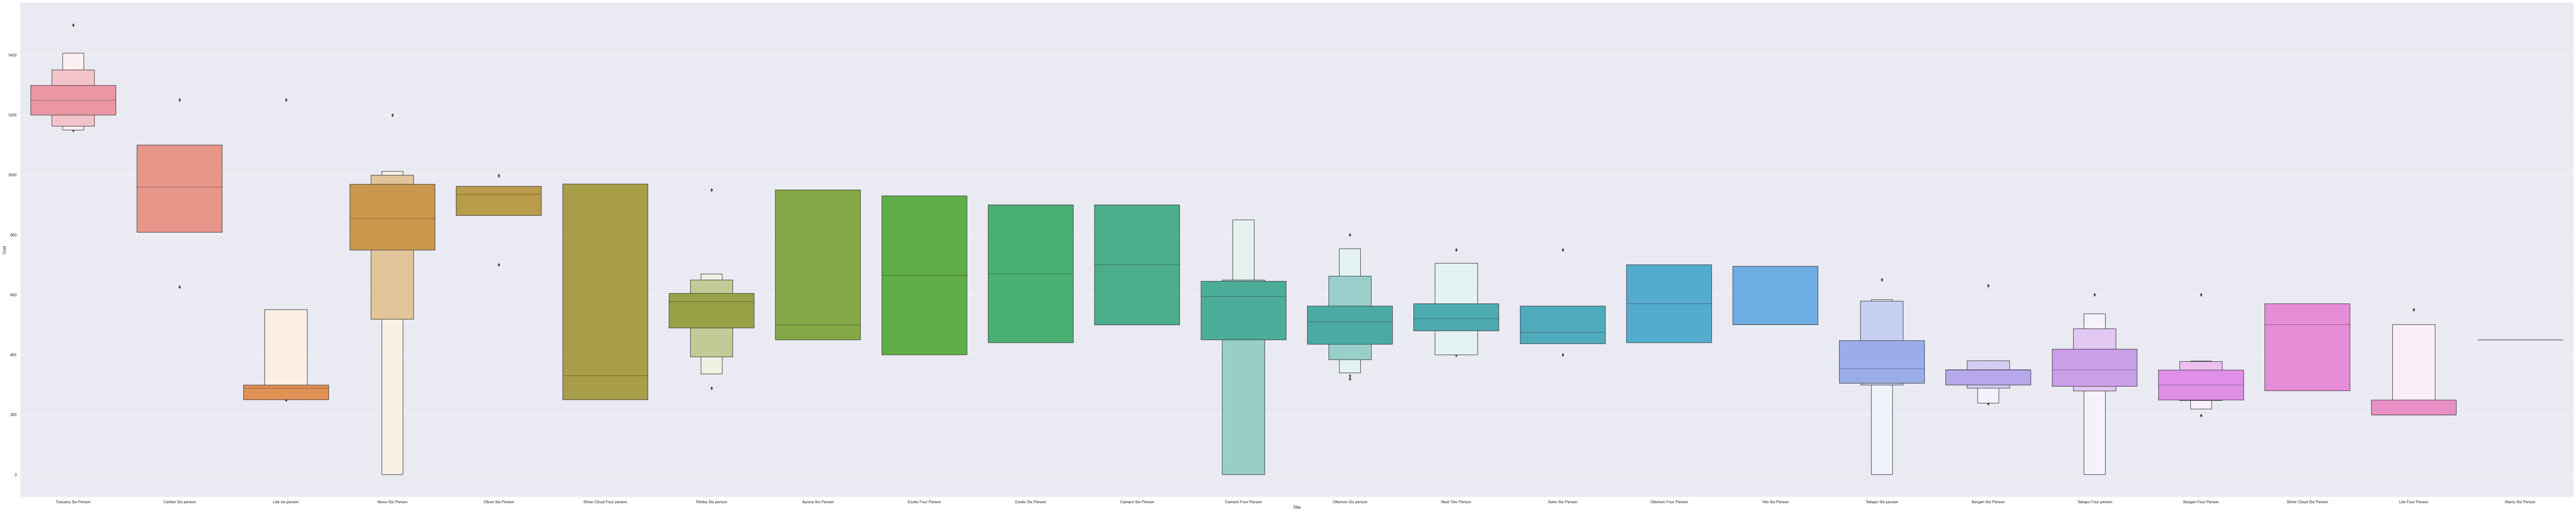

In [26]:
# hot tub tite vs price

sns.catplot(y = "Cost", x = "Title", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 20, aspect = 5)
plt.show()

In [27]:
#encoding

Title = tub_train_data[["Title"]]

Title = pd.get_dummies(Title, drop_first= True)

Title.head()

,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
tub_train_data["Series"].value_counts()

Comfort    430
Frame      155
Urban      155
Premium    115
Lite        80
Muse        40
Delight     30
Name: Series, dtype: int64

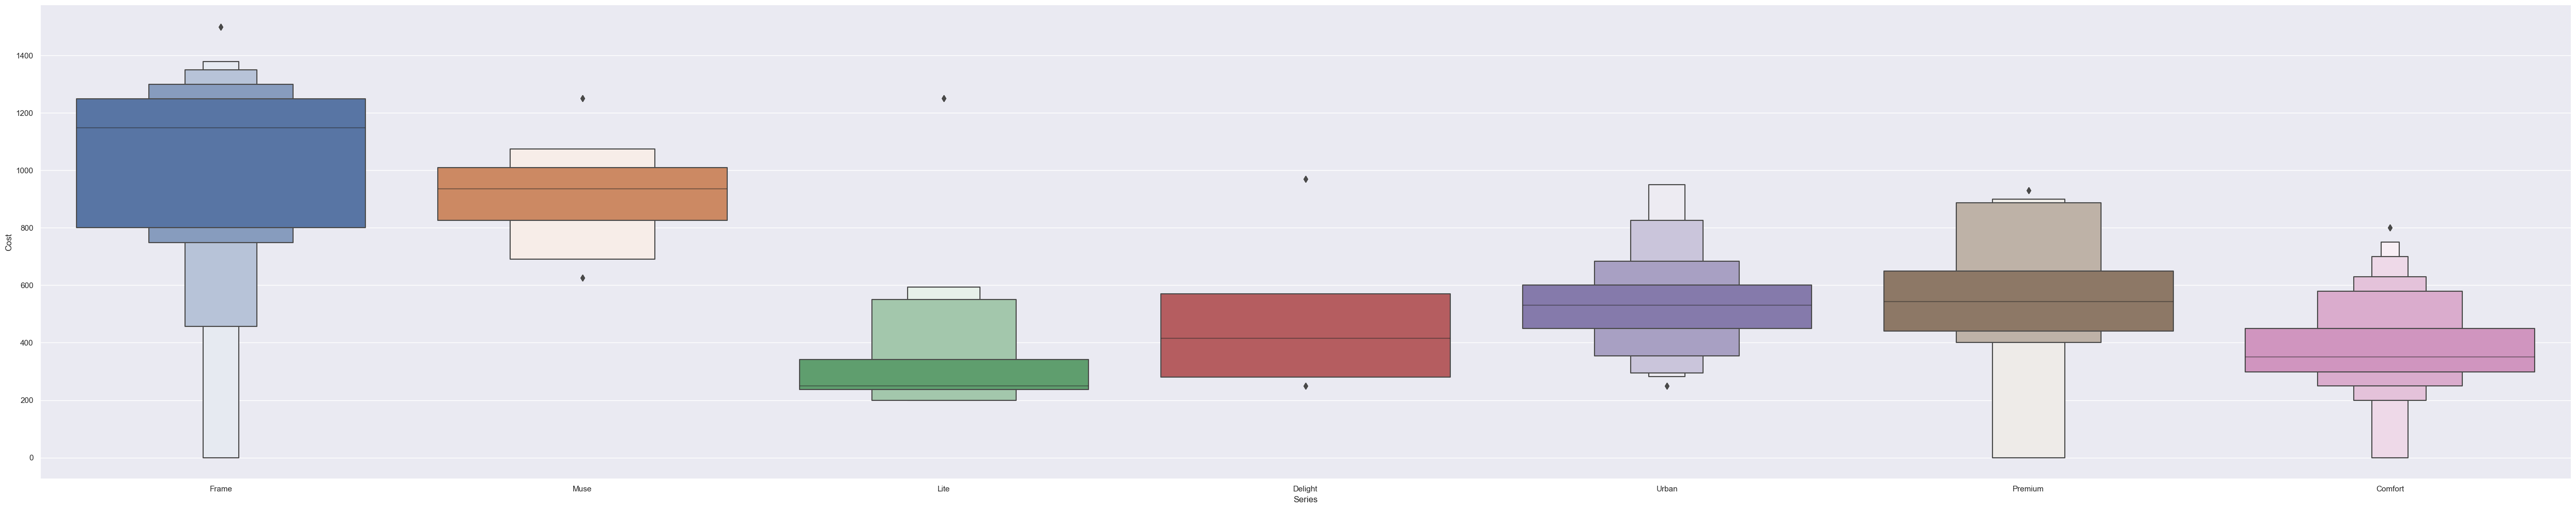

In [29]:
# Series vs Price

sns.catplot(y = "Cost", x = "Series", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 10, aspect = 5)
plt.show()

In [30]:
# Series comes under nominal data so we will do encoding
Series = tub_train_data[["Series"]]

Series = pd.get_dummies(Series, drop_first= False)

Series.head()

,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [31]:
#weather & shape are cateogarical data

tub_train_data.replace({"Sunny": 0, "Cloudy": 1, "Dry": 2, "Round":3, "Square":5, "Square Round":6, "Square round":7}, inplace = True)

In [32]:
tub_train_data.head(20)

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month
0,Cambs,Comfort,Bergen Four Person,4.0,2.0,0,5,299.0,23,6
1,Cambs,Comfort,Bergen Six Person,6.0,3.0,0,5,350.0,23,6
2,Cambs,Comfort,Tekapo Six person,6.0,3.0,0,3,579.0,23,6
3,Cambs,Comfort,Tekapo Four person,4.0,3.0,0,3,499.0,23,6
4,Cambs,Frame,Tuscany Six Person,6.0,5.0,0,3,1299.0,23,6
5,Cambs,Frame,Mono Six Person,6.0,5.0,0,3,999.0,23,6
6,Cambs,Urban,Rimba Six person,6.0,5.0,0,3,649.0,23,6
7,Cambs,Comfort,Ottomon Six person,6.0,4.0,0,3,549.0,23,6
8,Cambs,Premium,Camaro Four Person,4.0,5.0,0,3,649.0,23,6
9,Amazon,Comfort,Bergen Four Person,4.0,2.0,0,5,247.0,23,6


In [33]:
#combining tub_train_data + Make + Title+ Series

tub_data_train = pd.concat([tub_train_data, Make, Title, Series], axis = 1)

In [34]:
tub_data_train.head()

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,Cambs,Comfort,Bergen Four Person,4.0,2.0,0,5,299.0,23,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Cambs,Comfort,Bergen Six Person,6.0,3.0,0,5,350.0,23,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Cambs,Comfort,Tekapo Six person,6.0,3.0,0,3,579.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,Cambs,Comfort,Tekapo Four person,4.0,3.0,0,3,499.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,Cambs,Frame,Tuscany Six Person,6.0,5.0,0,3,1299.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [35]:
tub_data_train.drop(["Make", "Title", "Series"], axis = 1, inplace = True)

In [36]:
tub_data_train.head()

,Person,Rating(Sell),Weather,Shape,Cost,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,4.0,2.0,0,5,299.0,23,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6.0,3.0,0,5,350.0,23,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6.0,3.0,0,3,579.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4.0,3.0,0,3,499.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,6.0,5.0,0,3,1299.0,23,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [37]:
tub_data_train.shape

(1005, 43)

In [38]:
##TEST DATA

In [39]:
tub_test_data=pd.read_csv("/Users/kunaldeshpande/Desktop/Final Data/Experiments/19055288/19055288_testdata.csv", delimiter=',', header=None, skiprows=1, names=['Make','Date','Series','Title','Person','Rating(Sell)','Weather','Shape'])

In [40]:
pd.set_option('display.max_columns', None)

In [41]:
tub_test_data.head()

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round


In [42]:
tub_test_data.dropna(inplace=True)

In [43]:
tub_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          302 non-null    object
 1   Date          302 non-null    object
 2   Series        302 non-null    object
 3   Title         302 non-null    object
 4   Person        302 non-null    int64 
 5   Rating(Sell)  302 non-null    int64 
 6   Weather       302 non-null    object
 7   Shape         302 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.0+ KB


In [44]:
tub_test_data["Title"].value_counts()

Lite six person             27
Ottomon Six person          23
Rimba Six person            22
Lite Four Person            21
Bergen Four Person          21
Bergen Six Person           20
Tekapo Six person           15
Mono Six Person             15
Otium Six Person            12
Soho Six Person             12
Carlton Six person          12
Vito Six Person             12
Nest Two Person             12
Tekapo Four person          12
Ottomon Four Person          9
Camaro Four Person           9
Silver Cloud Four person     9
Silver Cloud Six Person      9
Tuscany Six Person           9
Camaro Six Person            6
Exotic Six Person            6
Exotic Four Person           6
Starry Six Person            3
Name: Title, dtype: int64

In [45]:
tub_test_data.shape


(302, 8)

In [46]:
tub_test_data.head(100)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round
...,...,...,...,...,...,...,...,...
95,Amazon,21/09/2022,Urban,Rimba Six person,6,5,Sunny,Round
96,Amazon,21/09/2022,Urban,Nest Two Person,2,5,Sunny,Square Round
97,Amazon,21/09/2022,Urban,Vito Six Person,6,5,Sunny,Square round
98,GSD,21/09/2022,Comfort,Bergen Four Person,4,3,Sunny,Round


In [47]:
tub_test_data.dropna(inplace=False)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round
...,...,...,...,...,...,...,...,...
297,Amazon,23/09/2022,Urban,Rimba Six person,6,5,Cloudy,Round
298,Amazon,23/09/2022,Urban,Nest Two Person,2,5,Cloudy,Square Round
299,Amazon,23/09/2022,Urban,Vito Six Person,6,5,Cloudy,Square round
300,GSD,23/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round


In [48]:
tub_test_data.shape

(302, 8)

In [49]:
tub_test_data.head()

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round


In [50]:
tub_test_data.isnull().sum()

Make            0
Date            0
Series          0
Title           0
Person          0
Rating(Sell)    0
Weather         0
Shape           0
dtype: int64

In [51]:
tub_test_data.head()

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round


In [52]:
#managing data type

In [53]:
tub_test_data["Sell_Date"] = pd.to_datetime(tub_test_data.Date, format="%d/%m/%Y").dt.day

In [54]:
tub_test_data["Sell_month"] = pd.to_datetime(tub_test_data["Date"], format = "%d/%m/%Y").dt.month

In [55]:
tub_test_data.head(15)

,Make,Date,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month
0,Amazon,12/09/2022,Comfort,Bergen Six Person,6,3,Cloudy,Round,12,9
1,Amazon,12/09/2022,Comfort,Bergen Four Person,4,3,Cloudy,Round,12,9
2,Amazon,12/09/2022,Comfort,Tekapo Six person,6,1,Cloudy,Square,12,9
3,Amazon,12/09/2022,Comfort,Tekapo Four person,4,1,Cloudy,Square,12,9
4,Amazon,12/09/2022,Comfort,Ottomon Six person,6,4,Cloudy,Round,12,9
5,Amazon,12/09/2022,Comfort,Ottomon Four Person,4,4,Cloudy,Round,12,9
6,Amazon,12/09/2022,Frame,Mono Six Person,6,5,Cloudy,Round,12,9
7,Amazon,12/09/2022,Urban,Rimba Six person,6,5,Cloudy,Round,12,9
8,Amazon,12/09/2022,Urban,Nest Two Person,2,5,Cloudy,Square Round,12,9
9,Amazon,12/09/2022,Urban,Vito Six Person,6,5,Cloudy,Square round,12,9


In [56]:
tub_test_data.drop(["Date"], axis = 1, inplace = True)
tub_test_data.head(15)


,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month
0,Amazon,Comfort,Bergen Six Person,6,3,Cloudy,Round,12,9
1,Amazon,Comfort,Bergen Four Person,4,3,Cloudy,Round,12,9
2,Amazon,Comfort,Tekapo Six person,6,1,Cloudy,Square,12,9
3,Amazon,Comfort,Tekapo Four person,4,1,Cloudy,Square,12,9
4,Amazon,Comfort,Ottomon Six person,6,4,Cloudy,Round,12,9
5,Amazon,Comfort,Ottomon Four Person,4,4,Cloudy,Round,12,9
6,Amazon,Frame,Mono Six Person,6,5,Cloudy,Round,12,9
7,Amazon,Urban,Rimba Six person,6,5,Cloudy,Round,12,9
8,Amazon,Urban,Nest Two Person,2,5,Cloudy,Square Round,12,9
9,Amazon,Urban,Vito Six Person,6,5,Cloudy,Square round,12,9


In [57]:
#Encoding same as traing data

In [58]:
tub_test_data["Make"].value_counts()

Amazon    111
Mspa       72
Cambs      36
Frono      34
GSD        31
Alice      18
Name: Make, dtype: int64

In [59]:
# As is Nominal Categorical data we will perform OneHotEncoding

Make =tub_test_data[["Make"]]

Make = pd.get_dummies(Make, drop_first= False)

Make.head()

,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [60]:
tub_test_data["Title"].value_counts()

Lite six person             27
Ottomon Six person          23
Rimba Six person            22
Lite Four Person            21
Bergen Four Person          21
Bergen Six Person           20
Tekapo Six person           15
Mono Six Person             15
Otium Six Person            12
Soho Six Person             12
Carlton Six person          12
Vito Six Person             12
Nest Two Person             12
Tekapo Four person          12
Ottomon Four Person          9
Camaro Four Person           9
Silver Cloud Four person     9
Silver Cloud Six Person      9
Tuscany Six Person           9
Camaro Six Person            6
Exotic Six Person            6
Exotic Four Person           6
Starry Six Person            3
Name: Title, dtype: int64

In [61]:
# As Title is Nominal Categorical data we will perform OneHotEncoding

Title = tub_test_data[["Title"]]

Title = pd.get_dummies(Title, drop_first= False)

Title.head()

,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [62]:
tub_test_data["Title"].value_counts()

Lite six person             27
Ottomon Six person          23
Rimba Six person            22
Lite Four Person            21
Bergen Four Person          21
Bergen Six Person           20
Tekapo Six person           15
Mono Six Person             15
Otium Six Person            12
Soho Six Person             12
Carlton Six person          12
Vito Six Person             12
Nest Two Person             12
Tekapo Four person          12
Ottomon Four Person          9
Camaro Four Person           9
Silver Cloud Four person     9
Silver Cloud Six Person      9
Tuscany Six Person           9
Camaro Six Person            6
Exotic Six Person            6
Exotic Four Person           6
Starry Six Person            3
Name: Title, dtype: int64

In [63]:
tub_test_data["Series"].value_counts()

Comfort    103
Lite        48
Urban       46
Premium     39
Frame       24
Muse        24
Delight     18
Name: Series, dtype: int64

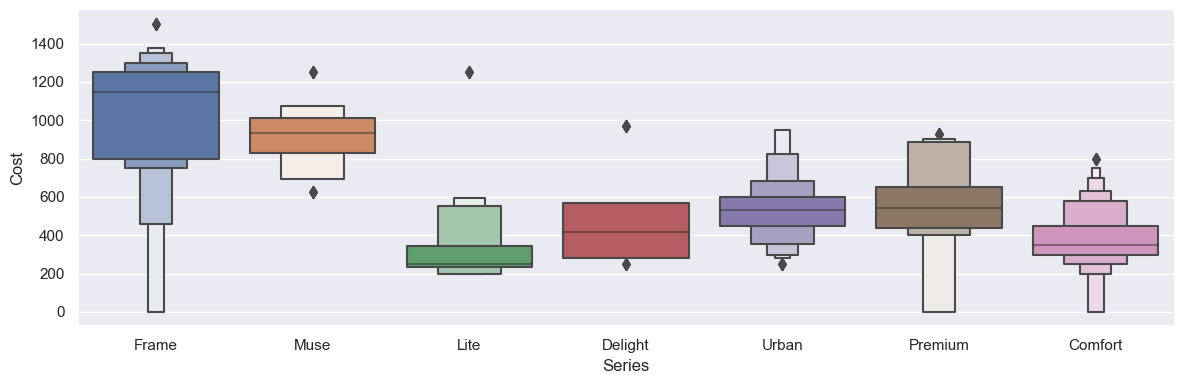

In [64]:
# hot tub series vs hot tub series

sns.catplot(y = "Cost", x = "Series", data = tub_train_data.sort_values("Cost", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [65]:
#one hot encoding dividing columns into more columns
Series =tub_test_data[["Series"]]

Series = pd.get_dummies(Series, drop_first= False)

Series.head()

,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [66]:

#label encoding

tub_test_data.replace({"Sunny": 0, "Cloudy": 1, "Dry": 2, "Round":3, "Square":5, "Square Round":6, "Square round":7}, inplace = True)

In [67]:
tub_test_data.head()

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month
0,Amazon,Comfort,Bergen Six Person,6,3,1,3,12,9
1,Amazon,Comfort,Bergen Four Person,4,3,1,3,12,9
2,Amazon,Comfort,Tekapo Six person,6,1,1,5,12,9
3,Amazon,Comfort,Tekapo Four person,4,1,1,5,12,9
4,Amazon,Comfort,Ottomon Six person,6,4,1,3,12,9


In [68]:
#lets merge all encoding

tub_data_test = pd.concat([tub_test_data, Make, Title, Series], axis = 1)

In [69]:
tub_data_test

,Make,Series,Title,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,Amazon,Comfort,Bergen Six Person,6,3,1,3,12,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Amazon,Comfort,Bergen Four Person,4,3,1,3,12,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Amazon,Comfort,Tekapo Six person,6,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,Amazon,Comfort,Tekapo Four person,4,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,Amazon,Comfort,Ottomon Six person,6,4,1,3,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Amazon,Urban,Rimba Six person,6,5,1,3,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
298,Amazon,Urban,Nest Two Person,2,5,1,6,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
299,Amazon,Urban,Vito Six Person,6,5,1,7,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
300,GSD,Comfort,Bergen Four Person,4,3,1,3,23,9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
tub_data_test.drop(["Make", "Title", "Series"], axis = 1, inplace = True)
tub_data_test.head()


,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,6,3,1,3,12,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,3,1,3,12,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,6,4,1,3,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [71]:
tub_data_test.shape

(302, 42)

In [72]:
tub_data_test.columns

Index(['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Sell_Date', 'Sell_month',
       'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono', 'Make_GSD',
       'Make_Mspa', 'Title_Bergen Four Person', 'Title_Bergen Six Person',
       'Title_Camaro Four Person', 'Title_Camaro Six Person',
       'Title_Carlton Six person', 'Title_Exotic Four Person',
       'Title_Exotic Six Person', 'Title_Lite Four Person',
       'Title_Lite six person', 'Title_Mono Six Person',
       'Title_Nest Two Person', 'Title_Otium Six Person',
       'Title_Ottomon Four Person', 'Title_Ottomon Six person',
       'Title_Rimba Six person', 'Title_Silver Cloud Four person',
       'Title_Silver Cloud Six Person', 'Title_Soho Six Person',
       'Title_Starry Six Person', 'Title_Tekapo Four person',
       'Title_Tekapo Six person', 'Title_Tuscany Six Person',
       'Title_Vito Six Person', 'Series_Comfort', 'Series_Delight',
       'Series_Frame', 'Series_Lite', 'Series_Muse', 'Series_Premium',
       'Se

In [73]:
tub_data_test.shape

(302, 42)

In [74]:
#This algoritham provides the best featuer selection techniques.

#finding best featuer which can contribute towards dependent featuer cost by heatmap,feature_importance,SelectKBest



In [75]:
tub_data_train.shape


(1005, 43)

In [76]:
tub_data_train.columns



Index(['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Cost', 'Sell_Date',
       'Sell_month', 'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono',
       'Make_GSD', 'Make_Mspa', 'Title_Bergen Four Person',
       'Title_Bergen Six Person', 'Title_Camaro Four Person',
       'Title_Camaro Six Person', 'Title_Carlton Six person',
       'Title_Exotic Four Person', 'Title_Exotic Six Person',
       'Title_Lite Four Person', 'Title_Lite six person',
       'Title_Mono Six Person', 'Title_Nest Two Person',
       'Title_Otium Six Person', 'Title_Ottomon Four Person',
       'Title_Ottomon Six person', 'Title_Rimba Six person',
       'Title_Silver Cloud Four person', 'Title_Silver Cloud Six Person',
       'Title_Soho Six Person', 'Title_Starry Six Person',
       'Title_Tekapo Four person', 'Title_Tekapo Six person',
       'Title_Tuscany Six Person', 'Title_Vito Six Person', 'Series_Comfort',
       'Series_Delight', 'Series_Frame', 'Series_Lite', 'Series_Muse',
       'Series_Premi

In [77]:
X = tub_data_train.loc[:,['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Sell_month',
       'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono', 'Make_GSD',
       'Make_Mspa', 'Title_Bergen Four Person', 'Title_Bergen Six Person',
       'Title_Camaro Four Person', 'Title_Camaro Six Person',
       'Title_Carlton Six person', 'Title_Exotic Four Person',
       'Title_Exotic Six Person', 'Title_Lite Four Person',
       'Title_Lite six person', 'Title_Mono Six Person',
       'Title_Nest Two Person', 'Title_Otium Six Person',
       'Title_Ottomon Four Person', 'Title_Ottomon Six person',
       'Title_Rimba Six person', 'Title_Silver Cloud Four person',
       'Title_Silver Cloud Six Person', 'Title_Soho Six Person',
       'Title_Starry Six Person', 'Title_Tekapo Four person',
       'Title_Tekapo Six person', 'Title_Tuscany Six Person',
       'Title_Vito Six Person', 'Series_Comfort', 'Series_Delight',
       'Series_Frame', 'Series_Lite', 'Series_Muse', 'Series_Premium',
       'Series_Urban'],]
X.head()

,Person,Rating(Sell),Weather,Shape,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,4.0,2.0,0,5,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6.0,3.0,0,5,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6.0,3.0,0,3,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4.0,3.0,0,3,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,6.0,5.0,0,3,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [78]:
X.shape

(1005, 41)

In [79]:
y = tub_data_train.iloc[:, 4]
y.head()

0     299.0
1     350.0
2     579.0
3     499.0
4    1299.0
Name: Cost, dtype: float64

In [80]:
y.shape

(1005,)

/var/folders/lq/x__jtmnd7q5178b8wcfcq7780000gn/T/ipykernel_13829/2053341494.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tub_train_data.corr(), annot = True, cmap = "RdYlGn")


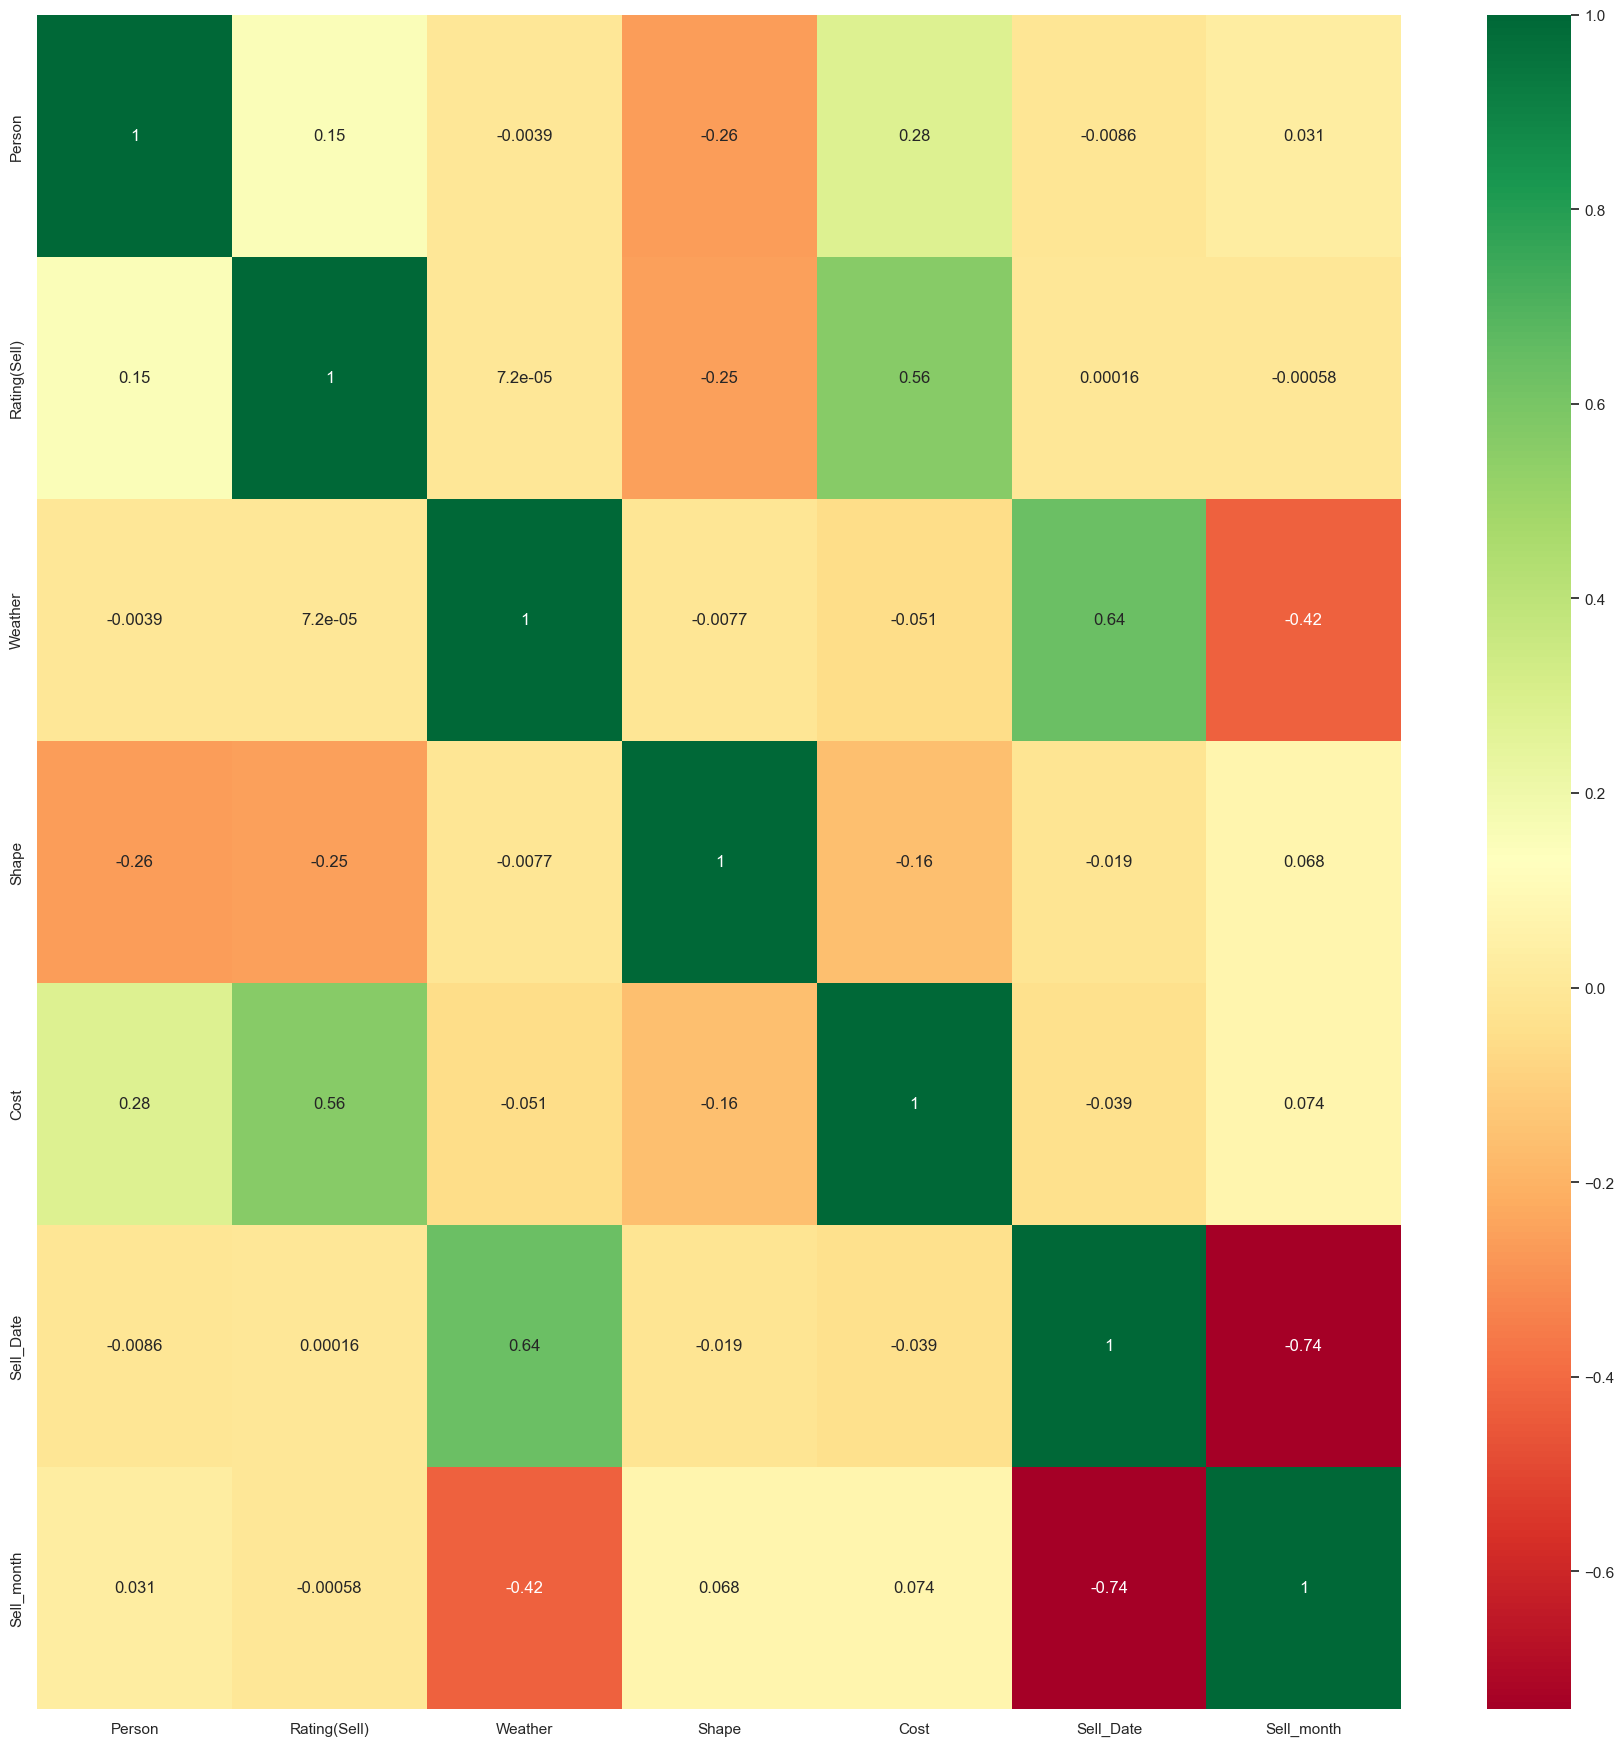

In [81]:
# Finding correlation b

plt.figure(figsize = (22,22))
sns.heatmap(tub_train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [91]:
# Important features using ExtraTreesRegressor
#Selection of feature_select

from sklearn.ensemble import ExtraTreesRegressor
feature_select = ExtraTreesRegressor()
feature_select.fit(X, y)

ExtraTreesRegressor()

In [92]:
print(feature_select.feature_importances_)

[4.96756393e-03 9.41589635e-02 5.81400940e-03 1.52939060e-02
 2.87137322e-02 5.77697625e-02 9.95063196e-03 4.01340051e-02
 8.94605556e-03 1.26094237e-02 8.12095422e-02 2.62195369e-03
 1.92508954e-03 7.02611277e-03 9.15181565e-04 8.89806664e-03
 4.33666455e-05 4.36168506e-05 5.01484644e-03 6.64520355e-03
 1.79392233e-02 6.31811359e-04 4.56823648e-04 5.97161561e-04
 6.98926377e-03 3.51693905e-03 1.54031856e-03 3.82209361e-03
 3.35670720e-03 3.65445762e-04 3.35885471e-03 4.63853836e-03
 4.24491303e-01 1.15590720e-04 5.86290309e-02 1.87782611e-03
 1.98524356e-02 1.33422980e-02 2.79437480e-02 6.87360627e-03
 6.95994714e-03]


In [93]:
feature_select.feature_importances_.shape

(41,)

<AxesSubplot:>

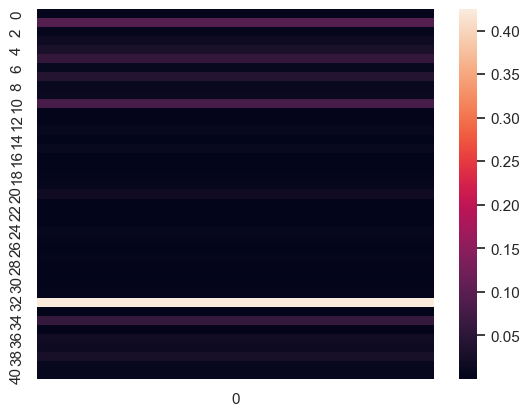

In [94]:
sns.heatmap(feature_select.feature_importances_.reshape(41,1))

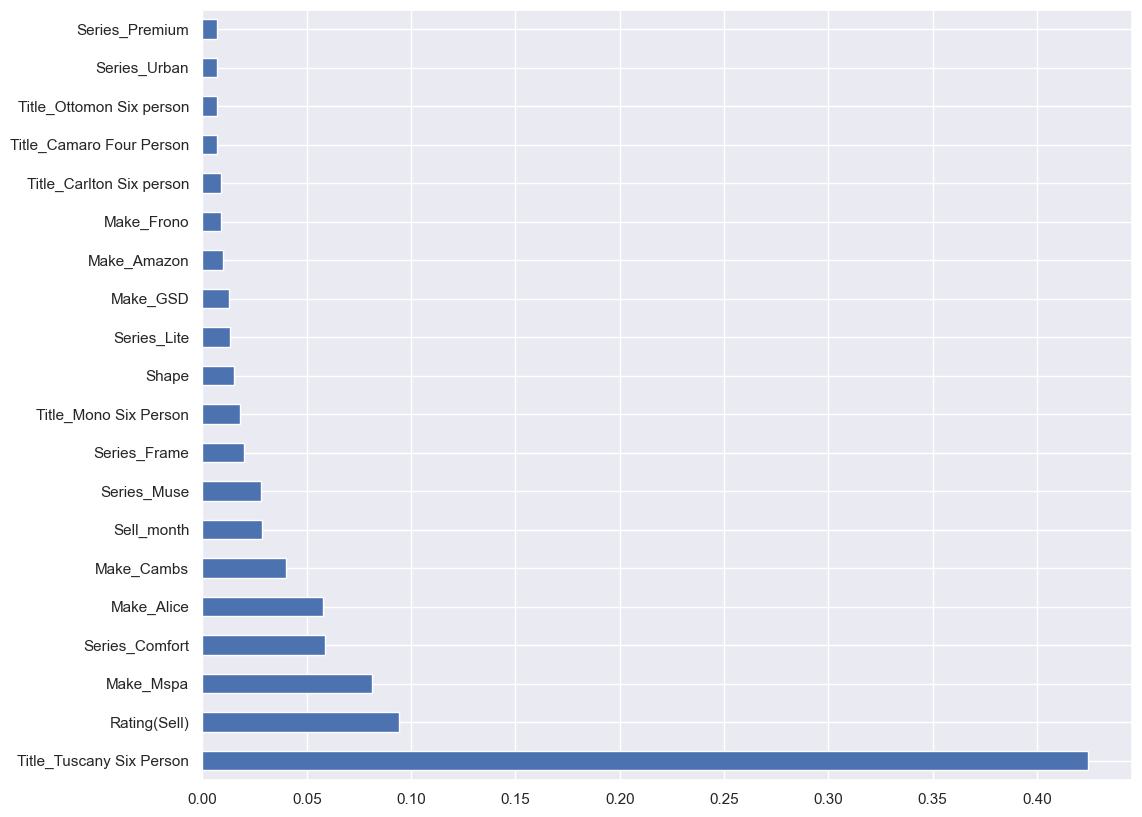

In [95]:
#plotting graph
#feat_importance of importance

plt.figure(figsize = (12,10))
importances = pd.Series(feature_select.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.7, random_state = 0)

In [97]:
from sklearn import tree

In [98]:

#model of tub_model

from sklearn.tree import DecisionTreeRegressor
tub_model= tree.DecisionTreeRegressor()
tub_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [99]:
#y_pred of #y_tub_pred

y_tub_pred =tub_model.predict(X_test)



In [100]:
tub_model.score(X_train, y_train)

0.9915667060008503

In [101]:
x=tub_model.score(X_test, y_test)
print("Accuarcy of the training model for the predicting output is ")
print(x)

Accuarcy of the training model for the predicting output is 
0.9738414428285133


/Users/kunaldeshpande/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


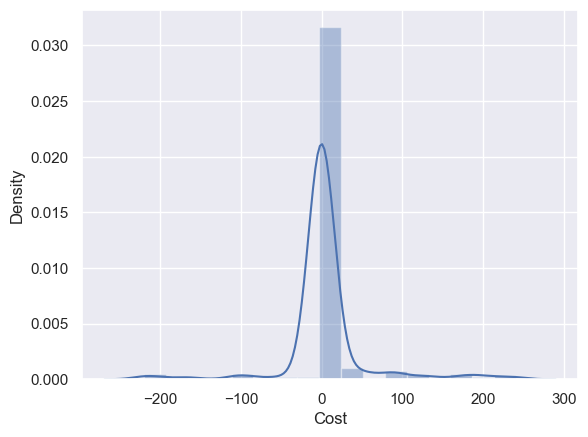

In [102]:
sns.distplot(y_test-y_tub_pred)
plt.show()


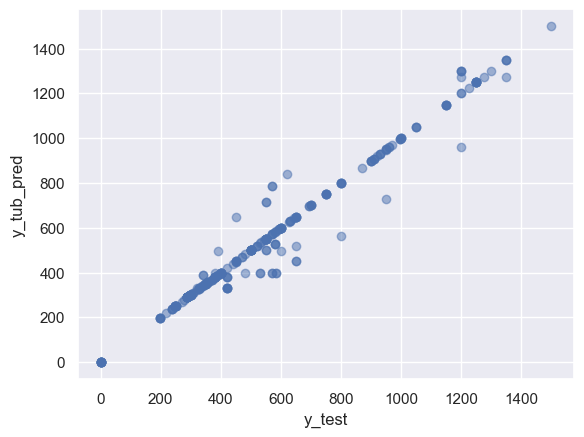

In [103]:
plt.scatter(y_test, y_tub_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_tub_pred")
plt.show()

In [104]:
from sklearn import metrics

In [105]:
print('Mean Absolute E:', metrics.mean_absolute_error(y_test, y_tub_pred))
print('Mean Squared E:', metrics.mean_squared_error(y_test, y_tub_pred))
print('Root mean squared E:', np.sqrt(metrics.mean_squared_error(y_test, y_tub_pred)))

Mean Absolute E: 16.835226269315676
Mean Squared E: 2615.6222683498895
Root mean squared E: 51.14315465778279


In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
outliers=[]
def detect_outliers(y_tub_pred):
    
    threshold=4
    mean = np.mean(y_tub_pred)
    std =np.std(y_tub_pred)
    
    
    for i in y_tub_pred:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [108]:
outlier_pt=detect_outliers(y_tub_pred)
outlier_pt

[]

In [109]:
sorted(y_tub_pred)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 198.95000000000002,
 198.95000000000002,
 198.95000000000002,
 198.9766666666667,
 199.0,
 219.0,
 237.0,
 237.0,
 239.0,
 239.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.94999999999993,
 249.94999999999993,
 249.94999999999993,
 249.94999999999993,
 249.99,
 269.99,
 279.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 309.0,
 309.0,
 319.95,
 327.0,
 327.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.95,
 329.99,
 339.0,
 339.0,
 339.99,
 349.0,
 349.0,
 349.0,
 349.0,
 349.0,
 349.0,
 349.95,
 349.99,
 350.0,
 350.0,
 350.0,
 357.0,
 357.0,
 359.0,
 359.0,
 359.0,
 369.0,
 369.0,
 369.0,
 377.0,
 377.0,
 377.0,
 379.0,
 379.0,
 379.0,
 379.0,
 379.0,
 379.0,
 379.0,
 379.0,

In [110]:
quantile1, quantile3= np.percentile(y_tub_pred,[25,75])

In [111]:
print(quantile1,quantile3)

329.0 699.98


In [112]:
iqr_value=quantile3-quantile1
print(iqr_value)

370.98


In [113]:
lower_bound_val = quantile1 -(1.75 * iqr_value) 
upper_bound_val = quantile3 +(1.75 * iqr_value) 

In [114]:
print(lower_bound_val,upper_bound_val)

-320.21500000000003 1349.1950000000002


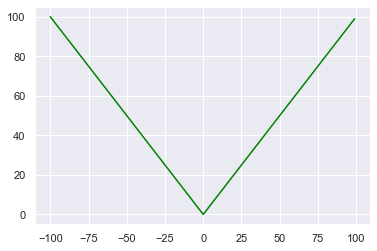

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  8

In [115]:

#plotting mean absolute error
#X as axes
#y_mean_absoloute_error is y_mae

from matplotlib import pyplot as plt
#MAE
x_axes = np.arange(-100, 100, 1)
y_mean_absolute_error= np.abs(x_axes)

plt.plot(x_axes, y_mean_absolute_error, "green")
plt.grid(True, which="both")
plt.show()

y_mean_absolute_error

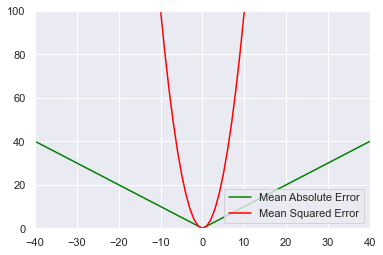

In [116]:
#MSE
y_mean_squared_error = np.square(x_axes)

plt.plot(x_axes, y_mean_absolute_error, "green", label="Mean Absolute Error")
plt.plot(x_axes, y_mean_squared_error, "red", label="Mean Squared Error")
plt.legend(loc="lower right")
plt.grid(True, which="both")
plt.axis([-40, 40, 0, 100])
plt.show()

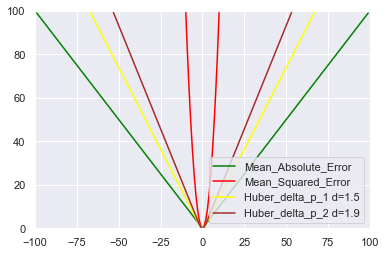

In [117]:
delta_p_1 = 1.5 #if delta=1 Huber loss = MAE. 
delta_p_2 = 1.9
mean_squared_e_huber = 0.5 * np.square(x_axes)
mean_absolute_e_huber1 = delta_p_1 * (np.abs(x_axes) - 0.5 * delta_p_1)
mean_absolute_e_huber2 = delta_p_2 * (np.abs(x_axes) - 0.5 * delta_p_2)
y_huber_first = np.where(np.abs(x_axes) <= delta_p_1, mean_squared_e_huber, mean_absolute_e_huber1)
y_huber_second = np.where(np.abs(x_axes) <= delta_p_1, mean_squared_e_huber, mean_absolute_e_huber2)

plt.plot(x_axes, y_mean_absolute_error, "green", label="Mean_Absolute_Error")
plt.plot(x_axes, y_mean_squared_error, "red", label="Mean_Squared_Error")
plt.plot(x_axes, y_huber_first, "yellow", label="Huber_delta_p_1 d=1.5")
plt.plot(x_axes, y_huber_second, "brown", label="Huber_delta_p_2 d=1.9")
plt.legend(loc="lower right")
plt.grid(True, which="both")
plt.axis([-100, 100, 0, 100])
plt.show()



In [118]:
def huber_loss_function(y_tub_pred, y_test,delta=2):
    huber_mean_squared_error = 0.5*(y_test-y_tub_pred)**2
    huber_mean_absolute_error = delta * (np.abs(y_test - y_tub_pred) - 0.5 * delta)
    return np.where(np.abs(y_test - y_tub_pred) <= delta, huber_mean_squared_error, huber_mean_absolute_error)

huber_loss_function(y_tub_pred, y_test)



array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.40000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.48990000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.78000000e+02, 4.29980000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.30066667e+02, 0.00000000e+00, 3.97980000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.09000000e+02, 0.00000000e+00,
       1.78000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [119]:
huber_mean_squared_error = 1/2*(y_test-y_tub_pred)**2
huber_mean_squared_error


710        0.00000
666        0.00000
298        0.00000
356        0.00000
571        0.00020
          ...     
474    17114.35005
416        0.00000
10         0.00000
105        0.00000
68         0.00000
Name: Cost, Length: 302, dtype: float64

In [120]:
import statistics
kunal = statistics.mean(huber_mean_squared_error)
kunal

1307.8111341749448

In [121]:
print('Root mean squared E of huber loss:', np.sqrt(kunal))

Root mean squared E of huber loss: 36.16367146979057


In [122]:

1248/(max(y)-min(y))


0.8320055467036447

In [123]:
metrics.r2_score(y_test, y_tub_pred)


0.9738414428285133

In [124]:
#Hyperparameter Tuning

#Choose following method for hyperparameter tuning
#RandomizedSearchCV --> Fast
#GridSearchCV
#Assign hyperparameters in form of dictionery
#Fit the model
#Check best paramters and best score

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
#Randomized Search CV

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 5, 10]

In [127]:
# Create the random grid

#random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf}

In [128]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
#rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)



In [129]:
tub_model.fit(X_train,y_train)


DecisionTreeRegressor()

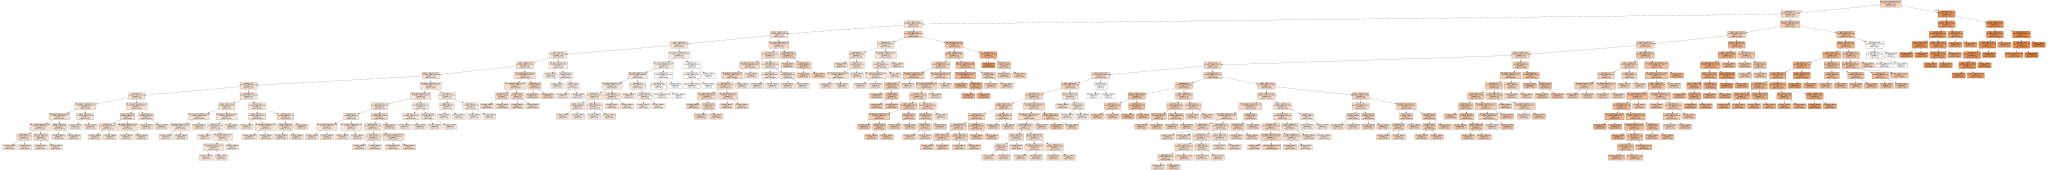

In [130]:
from sklearn import tree
import graphviz
tree_data_visual = tree.export_graphviz(tub_model, feature_names=list(X), filled=True)
graphviz.Source(tree_data_visual)

rf_random.best_params_

In [131]:
hot_tub_prediction = tub_model.predict(X_test)

In [132]:
def huber_loss(y_test,hot_tub_prediction  , delta=1.5):
    huber_mean_squared_error = 0.5*(y_test-hot_tub_prediction)**2
    huber_mean_absolute_error = delta * (np.abs(y_test - hot_tub_prediction) - 0.5 * delta)
    return np.where(np.abs(y_test - hot_tub_prediction) <= delta, huber_mean_squared_error, huber_mean_absolute_error)

huber_loss(y_test,hot_tub_prediction)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.55375000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.12117500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.33875000e+02, 3.22860000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.47925000e+02, 0.00000000e+00, 2.98860000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.57125000e+02, 0.00000000e+00,
       1.33875000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [133]:
import pickle
# open a file, where you ant to store the data
file = open('tub_tree.pkl', 'wb')

# dump information to that file
pickle.dump(tub_model, file)





In [134]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [135]:
tub_data_test.columns

Index(['Person', 'Rating(Sell)', 'Weather', 'Shape', 'Sell_Date', 'Sell_month',
       'Make_Alice', 'Make_Amazon', 'Make_Cambs', 'Make_Frono', 'Make_GSD',
       'Make_Mspa', 'Title_Bergen Four Person', 'Title_Bergen Six Person',
       'Title_Camaro Four Person', 'Title_Camaro Six Person',
       'Title_Carlton Six person', 'Title_Exotic Four Person',
       'Title_Exotic Six Person', 'Title_Lite Four Person',
       'Title_Lite six person', 'Title_Mono Six Person',
       'Title_Nest Two Person', 'Title_Otium Six Person',
       'Title_Ottomon Four Person', 'Title_Ottomon Six person',
       'Title_Rimba Six person', 'Title_Silver Cloud Four person',
       'Title_Silver Cloud Six Person', 'Title_Soho Six Person',
       'Title_Starry Six Person', 'Title_Tekapo Four person',
       'Title_Tekapo Six person', 'Title_Tuscany Six Person',
       'Title_Vito Six Person', 'Series_Comfort', 'Series_Delight',
       'Series_Frame', 'Series_Lite', 'Series_Muse', 'Series_Premium',
       'Se

In [136]:
tub_data_test.shape

(302, 42)

In [137]:
tub_data_test

,Person,Rating(Sell),Weather,Shape,Sell_Date,Sell_month,Make_Alice,Make_Amazon,Make_Cambs,Make_Frono,Make_GSD,Make_Mspa,Title_Bergen Four Person,Title_Bergen Six Person,Title_Camaro Four Person,Title_Camaro Six Person,Title_Carlton Six person,Title_Exotic Four Person,Title_Exotic Six Person,Title_Lite Four Person,Title_Lite six person,Title_Mono Six Person,Title_Nest Two Person,Title_Otium Six Person,Title_Ottomon Four Person,Title_Ottomon Six person,Title_Rimba Six person,Title_Silver Cloud Four person,Title_Silver Cloud Six Person,Title_Soho Six Person,Title_Starry Six Person,Title_Tekapo Four person,Title_Tekapo Six person,Title_Tuscany Six Person,Title_Vito Six Person,Series_Comfort,Series_Delight,Series_Frame,Series_Lite,Series_Muse,Series_Premium,Series_Urban
0,6,3,1,3,12,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,3,1,3,12,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,6,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,4,1,1,5,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,6,4,1,3,12,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,6,5,1,3,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
298,2,5,1,6,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
299,6,5,1,7,23,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
300,4,3,1,3,23,9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [157]:
hot_tub_predcition = forest.predict(tub_data_test)
import pandas as pd
df=pd.DataFrame(hot_tub_predcition)



In [158]:
y_test.shape

(302,)

In [159]:
metrics.r2_score(y_test,hot_tub_prediction)

0.9735098014145337

In [160]:
print('Mean Absoulte E:', metrics.mean_absolute_error(y_test, hot_tub_prediction))
print('Mean Squared E:', metrics.mean_squared_error(y_test, hot_tub_prediction ))
print('Root Mean Squared E:', np.sqrt(metrics.mean_squared_error(y_test, hot_tub_prediction)))

Mean Absoulte E: 17.134812362030903
Mean Squared E: 2648.7834500551876
Root Mean Squared E: 51.466333170871884


/Users/kunaldeshpande/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


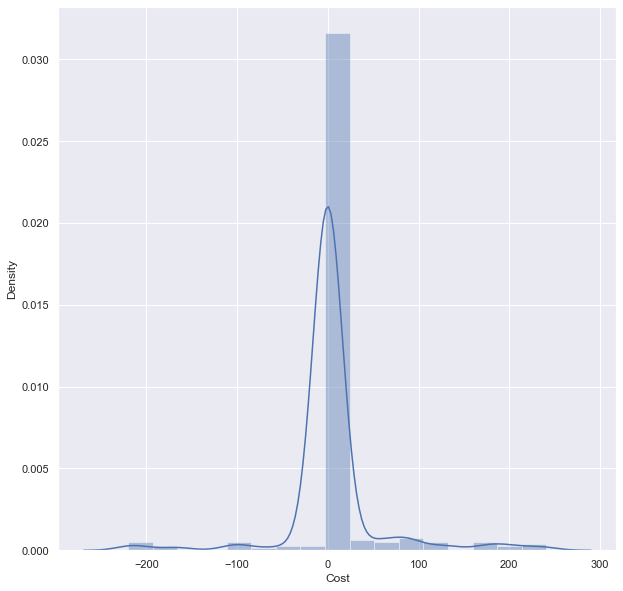

In [161]:
plt.figure(figsize = (10,10))
sns.distplot(y_test-hot_tub_prediction)
plt.show()

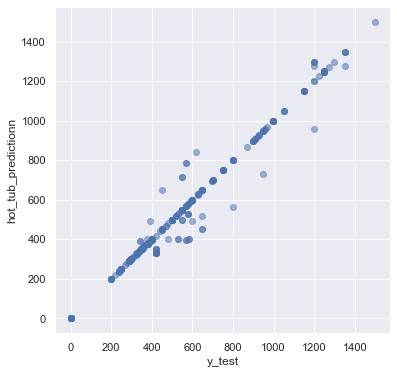

In [162]:
plt.figure(figsize = (6,6))
plt.scatter(y_test, hot_tub_prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("hot_tub_predictionn")
plt.show()

In [163]:
sorted(hot_tub_prediction)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 198.95000000000002,
 198.95000000000002,
 198.95000000000002,
 198.9766666666667,
 199.0,
 219.0,
 237.0,
 237.0,
 239.0,
 239.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.0,
 249.94999999999993,
 249.94999999999993,
 249.94999999999993,
 249.94999999999993,
 249.99,
 269.99,
 279.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 289.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 299.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 309.0,
 309.0,
 319.95,
 327.0,
 327.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.0,
 329.95,
 329.99,
 339.0,
 339.0,
 339.99,
 349.0,
 349.0,
 349.0,
 349.0,
 349.0,
 349.0,
 349.0,
 349.0,
 349.0,
 349.95,
 349.99,
 350.0,
 350.0,
 350.0,
 357.0,
 357.0,
 359.0,
 359.0,
 359.0,
 369.0,
 369.0,
 369.0,
 377.0,
 377.0,
 377.0,
 379.0,
 379.0,
 379.0,
 379.0,
 379.0,

In [164]:
quantile1, quantile3= np.percentile(hot_tub_prediction,[25,75])

In [165]:
print(quantile1, quantile3)

329.0 699.98


In [166]:
iqr_value=quantile3-quantile1
print(iqr_value)

370.98


In [167]:
lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

In [168]:
print(lower_bound_val,upper_bound_val)

-227.47000000000003 1256.45


In [169]:
def huber_loss(y_test,hot_tub_prediction  , delta=1.5):
    huber_mean_squared_error = 0.5*(y_test-hot_tub_prediction)**2
    huber_mean_absolute_error = delta * (np.abs(y_test - hot_tub_prediction) - 0.5 * delta)
    return np.where(np.abs(y_test - hot_tub_prediction) <= delta, huber_mean_squared_error, huber_mean_absolute_error)

huber_loss(y_test,hot_tub_prediction)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.55375000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.12117500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.33875000e+02, 3.22860000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.47925000e+02, 0.00000000e+00, 2.98860000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.57125000e+02, 0.00000000e+00,
       1.33875000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [170]:
huber_mean_squared_error2 = 1/2*(y_test-hot_tub_prediction)**2


In [171]:
import statistics
kunal = statistics.mean(huber_mean_squared_error2)
kunal

1324.3917250275938

In [172]:
np.sqrt(kunal)

36.39219318792966